# Table of Contents | ASD DATA 

- [The BREAST-CANCER dataset](#The-BREAST-CANCER-dataset):
    - [Load the dataset](#Load-the-Dataset)
    - [Explore the dataset: Descriptive statistics](#Explore-the-dataset:-Descriptive-statistics)
    - [Explore the dataset: Visualization](#Explore-the-dataset:-Visualization)
    



The entire project has been based on the following study [Investigating the Correspondence of Clinical  Diagnostic Grouping With Underlying Neurobiological and Phenotypic Clusters Using Unsupervised Machine Learning](https://doi.org/10.1016/j.dib.2018.01.080).

The work focuses on two different pathologies in brain disorders: ASD and ADHD

## The ASD dataset

available at [ABIDE I database](https://fcon_1000.projects.nitrc.org/indi/abide/abide_I.html).


This is .......
 
This data set includes 286 intances (201 of one class, 85 of another class).  The instances are described by 9 attributes, some of which are ordinal and some are nominal.
 
Attribute information

| column | values |
| --- | --- |
| Class | no-recurrence-events, recurrence-events |
| age | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99|
| menopause | lt40, ge40, premeno|
| tumor-size | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59|
| inv-nodes | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39|
| node-caps | yes, no|
| deg-malig | 1, 2, 3|
| breast | left, right|
| breast-quad | left-up, left-low, right-up, right-low, central|
| irradiat | yes, no|
 
There are 9 Missing Attribute Values (denoted by "?") 


In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #for the plots
import seaborn as sns 

We start opening the dataset. 

pd. We know from  the datasheets of the dataset provided by ABIDE which are the ranges of the categories and we noted that there are some values in the data categorized as -9999, which is a way to denoted missing data or values out of range, so we are going to consider them as NaN.

In [24]:
ASD_phenotypic = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD','ASD_phenotypic.csv'))


In [ ]:
#visualizziamo, non completamente, il nostro dataset
#e otteniamone la dimensione: prima info utile
ASD_phenotypic

In [35]:
ASD_phenotypic.head() #in order to underline features

SITE_ID  SUB_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  \
0  CALTECH   51456         1          4         55.4    1                   R   
1  CALTECH   51457         1          4         22.9    1                Ambi   
2  CALTECH   51458         1          1         39.2    1                   R   
3  CALTECH   51459         1          1         22.8    1                   R   
4  CALTECH   51460         1          1         34.6    2                Ambi   

   HANDEDNESS_SCORES    FIQ    VIQ    PIQ FIQ_TEST_TYPE VIQ_TEST_TYPE  \
0                NaN  126.0  118.0  128.0          WASI          WASI   
1                NaN  107.0  119.0   93.0          WASI          WASI   
2                NaN   93.0   80.0  108.0          WASI          WASI   
3                NaN  106.0   94.0  118.0          WASI          WASI   
4                NaN  133.0  135.0  122.0          WASI          WASI   

  PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  \
0          WASI               -9999.0                -9999.0          -9999.0   
1          WASI                  23.0                   17.0              5.0   
2          WASI                  13.0                   18.0              7.0   
3          WASI                  12.0                   12.0              2.0   
4          WASI                  21.0                   11.0              6.0   

   ADI_R_ONSET_TOTAL_D  ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  \
0              -9999.0                   NaN          4.0         9.0   
1                  3.0                   1.0          4.0         8.0   
2                  4.0                   1.0          4.0        20.0   
3                  1.0                   1.0          4.0        12.0   
4                  3.0                   1.0          4.0        13.0   

   ADOS_COMM  ADOS_SOCIAL  ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  \
0        2.0          7.0                2.0                  1.0   
1        3.0          5.0                1.0                  1.0   
2        6.0         14.0                2.0                  1.0   
3        4.0          8.0                0.0                  1.0   
4        4.0          9.0                1.0                  1.0   

   ADOS_GOTHAM_SOCAFFECT  ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  \
0                    NaN              NaN                NaN   
1                    NaN              NaN                NaN   
2                    NaN              NaN                NaN   
3                    NaN              NaN                NaN   
4                    NaN              NaN                NaN   

   ADOS_GOTHAM_SEVERITY  SRS_VERSION  SRS_RAW_TOTAL  SRS_AWARENESS  \
0                   NaN          NaN            NaN            NaN   
1                   NaN          NaN            NaN            NaN   
2                   NaN          NaN            NaN            NaN   
3                   NaN          NaN            NaN            NaN   
4                   NaN          NaN            NaN            NaN   

   SRS_COGNITION  SRS_COMMUNICATION  SRS_MOTIVATION  SRS_MANNERISMS  \
0            NaN                NaN             NaN             NaN   
1            NaN                NaN             NaN             NaN   
2            NaN                NaN             NaN             NaN   
3            NaN                NaN             NaN             NaN   
4            NaN                NaN             NaN             NaN   

   SCQ_TOTAL  AQ_TOTAL COMORBIDITY CURRENT_MED_STATUS MEDICATION_NAME  \
0        NaN       NaN         NaN                NaN             NaN   
1        NaN       NaN         NaN                NaN             NaN   
2        NaN       NaN         NaN                NaN             NaN   
3        NaN       NaN         NaN                NaN             NaN   
4        NaN       NaN         NaN                NaN             NaN   

   OFF_STIMULANTS_AT_SCAN  VINELAND_RECEPTIVE_V_SCALED  \
0     

In [36]:
#otteniamo le informazioni relative al dataset
ASD_phenotypic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SITE_ID                          1112 non-null   object 
 1   SUB_ID                           1112 non-null   int64  
 2   DX_GROUP                         1112 non-null   int64  
 3   DSM_IV_TR                        1112 non-null   int64  
 4   AGE_AT_SCAN                      1112 non-null   float64
 5   SEX                              1112 non-null   int64  
 6   HANDEDNESS_CATEGORY              797 non-null    object 
 7   HANDEDNESS_SCORES                370 non-null    float64
 8   FIQ                              1077 non-null   float64
 9   VIQ                              935 non-null    float64
 10  PIQ                              953 non-null    float64
 11  FIQ_TEST_TYPE                    947 non-null    object 
 12  VIQ_TEST_TYPE       

#  CATEGORICAL EXPLORATION

In [28]:
#vogliamo individuare e capire cosa sono questi object
objects = ASD_phenotypic.select_dtypes(include=['object'])
objects.T

0        1        2        3        4     ...  \
SITE_ID              CALTECH  CALTECH  CALTECH  CALTECH  CALTECH  ...   
HANDEDNESS_CATEGORY        R     Ambi        R        R     Ambi  ...   
FIQ_TEST_TYPE           WASI     WASI     WASI     WASI     WASI  ...   
VIQ_TEST_TYPE           WASI     WASI     WASI     WASI     WASI  ...   
PIQ_TEST_TYPE           WASI     WASI     WASI     WASI     WASI  ...   
COMORBIDITY              NaN      NaN      NaN      NaN      NaN  ...   
CURRENT_MED_STATUS       NaN      NaN      NaN      NaN      NaN  ...   
MEDICATION_NAME          NaN      NaN      NaN      NaN      NaN  ...   

                          1107       1108       1109       1110       1111  
SITE_ID                   YALE       YALE       YALE       YALE       YALE  
HANDEDNESS_CATEGORY          R          L          L          R          R  
FIQ_TEST_TYPE        DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  
VIQ_TEST_TYPE        DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  
PIQ_TEST_TYPE        DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  DAS_II_SA  
COMORBIDITY                NaN        NaN        NaN        NaN        NaN  
CURRENT_MED_STATUS         NaN        NaN        NaN        NaN        NaN  
MEDICATION_NAME            NaN        NaN        NaN        NaN        NaN  

[8 rows x 1112 columns]

To understand better how to treat the information gived by this categorical variables we are interested in know which values are stored in this features. We will analyze all of them.

## Handling categorical variables

In [ ]:
#attraverserà ogni colonna nel DataFrame objects, che contiene solo le colonne di tipo 
#'object', e per ciascuna colonna stampa il nome della feature, il numero di valori unici,
#i valori unici stessi e il numero di valori mancanti (NaN)

#for column in objects.columns:
 #   print("Nome della feature:", column)
  #  unique_values = objects[column].unique()  # Ottieni i valori unici
   # nan_count = objects[column].isnull().sum()  # Conta i valori mancanti
    #print("Numero di valori unici:", len(unique_values))
    #print("Valori unici:")
    #for value in unique_values:
      #  print("-", value)
    #print("Numero di valori mancanti (NaN):", nan_count)
    #print("----------------------------------")

In [33]:
for column_name in objects.columns:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    # Get and display unique values and their frequencies
    print("Unique values in column", column_name, "and their frequencies:")
    unique_values_counts = objects[column_name].value_counts(dropna=False)
    print(unique_values_counts)
    print("__________________________________________\n") #to separate features

    #N.B. come output
    #"Name: count, dtype: int64" non fa parte dei risultati effettivi dei valori unici e dei loro conteggi, ma è solo una rappresentazione dell'indice della Serie e del tipo di dato dei suoi valori. Quindi, puoi ignorare questo messaggio se stai cercando solo i valori unici e i loro conteggi.

Unique values in column SITE_ID and their frequencies:
SITE_ID
NYU         184
UM_1        110
USM         101
UCLA_1       82
MAX_MUN      57
PITT         57
YALE         56
KKI          55
TRINITY      49
STANFORD     40
CALTECH      38
SDSU         36
OLIN         36
LEUVEN_2     35
UM_2         35
SBL          30
LEUVEN_1     29
OHSU         28
CMU          27
UCLA_2       27
Name: count, dtype: int64
__________________________________________

Unique values in column HANDEDNESS_CATEGORY and their frequencies:
HANDEDNESS_CATEGORY
R        693
NaN      315
L         71
Ambi      15
-9999     11
Mixed      6
L->R       1
Name: count, dtype: int64
__________________________________________

Unique values in column FIQ_TEST_TYPE and their frequencies:
FIQ_TEST_TYPE
WASI                  551
NaN                   165
WISC_IV_FULL          103
WAIS_III               63
DAS_II_SA              56
WST                    41
WISC_III_DUTCH         35
WISC_IV_4_SUBTESTS     33
WISC            

Exploding categorical features, we notice the presesence of value -9999, used to denoted missing data or values out of range, so we are going to consider them as NaN. Globalmente.

In [42]:
# Sostituisci il valore -9999 con NaN in tutto il DataFrame
ASD_phenotypic.replace(-9999, np.nan, inplace=True)
#ASD_phenotypic

SITE_ID  SUB_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX  \
0      CALTECH   51456         1        4.0      55.4000    1   
1      CALTECH   51457         1        4.0      22.9000    1   
2      CALTECH   51458         1        1.0      39.2000    1   
3      CALTECH   51459         1        1.0      22.8000    1   
4      CALTECH   51460         1        1.0      34.6000    2   
5      CALTECH   51461         1        4.0      37.7000    1   
6      CALTECH   51462         1        1.0      20.2000    2   
7      CALTECH   51463         1        1.0      20.2000    2   
8      CALTECH   51464         1        1.0      20.9000    1   
9      CALTECH   51465         1        1.0      20.2000    1   
10     CALTECH   51466         1        1.0      27.6000    1   
11     CALTECH   51467         1        1.0      23.4000    1   
12     CALTECH   51468         1        1.0      20.1000    1   
13     CALTECH   51469         1        4.0      45.1000    1   
14     CALTECH   51470         1        4.0      29.1000    1   
15     CALTECH   51471         1        4.0      22.4000    2   
16     CALTECH   51472         1        1.0      17.5000    1   
17     CALTECH   51473         1        1.0      21.2000    1   
18     CALTECH   51474         1        1.0      20.9000    1   
19     CALTECH   51475         2        0.0      44.2000    1   
20     CALTECH   51476         2        0.0      39.3000    1   
21     CALTECH   51477         2        0.0      42.5000    1   
22     CALTECH   51478         2        0.0      19.7000    1   
23     CALTECH   51479         2        0.0      20.0000    2   
24     CALTECH   51480         2        0.0      20.8000    2   
25     CALTECH   51481         2        0.0      27.9000    1   
26     CALTECH   51482         2        0.0      21.1000    2   
27     CALTECH   51483         2        0.0      20.9000    1   
28     CALTECH   51484         2        0.0      23.6000    1   
29     CALTECH   51485         2        0.0      23.9000    1   
30     CALTECH   51486         2        0.0      22.0000    1   
31     CALTECH   51487         2        0.0      17.0000    1   
32     CALTECH   51488         2        0.0      23.3000    1   
33     CALTECH   51489         2        0.0      34.1000    1   
34     CALTECH   51490         2        0.0      44.1000    1   
35     CALTECH   51491         2        0.0      56.2000    1   
36     CALTECH   51492         2        0.0      18.7000    1   
37     CALTECH   51493         2        0.0      29.2000    2   
38         CMU   50642         1        1.0      33.0000    1   
39         CMU   50643         1        1.0      21.0000    1   
40         CMU   50644         1        1.0      19.0000    2   
41         CMU   50645         1        1.0      20.0000    1   
42         CMU   50646         1        1.0      21.0000    1   
43         CMU   50647         1        1.0      27.0000    1   
44         CMU   50648         1        1.0      31.0000    2   
45         CMU   50649         1        1.0      22.0000    1   
46         CMU   50650         1        1.0      31.0000    2   
47         CMU   50651         1        1.0      39.0000    1   
48         CMU   50652         1        1.0      24.0000    1   
49         CMU   50653         1        1.0      30.0000    1   
50         CMU   50654         1        1.0      24.0000    1   
51         CMU   50655         1        1.0      27.0000    1   
52         CMU   50656         2        0.0      28.0000    2   
53         CMU   50657         2        0.0      21.0000    1   
54         CMU   50658         2        0.0      27.0000    1   
55         CMU   50659         2        0.0      27.0000    1   
56         CMU   50660         2        0.0      25.0000    1   
57         CMU   50661         2        0.0      20.0000    2   
58         CMU   50663         2        0.0      21.0000    1   
59         CMU   50664         2        0.0      21.0000    1   
60         CMU   50665         2        0.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Applica il LabelEncoder a ciascuna feature di tipo object
for column in objects.columns:
    ASD_phenotypic[column] = label_encoder.fit_transform(ASD_phenotypic[column])

mapping = {'R': 100, 'L': -100, 'Ambi': 0, 'Mixed': 0, 'L->R': 0}

# Replace values in the specified column
ASD_phenotypic[column_name] = ASD_phenotypic[column_name].replace(mapping)
ASD_phenotypic



SITE_ID  SUB_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX  \
0           0   51456         1        4.0      55.4000    1   
1           0   51457         1        4.0      22.9000    1   
2           0   51458         1        1.0      39.2000    1   
3           0   51459         1        1.0      22.8000    1   
4           0   51460         1        1.0      34.6000    2   
5           0   51461         1        4.0      37.7000    1   
6           0   51462         1        1.0      20.2000    2   
7           0   51463         1        1.0      20.2000    2   
8           0   51464         1        1.0      20.9000    1   
9           0   51465         1        1.0      20.2000    1   
10          0   51466         1        1.0      27.6000    1   
11          0   51467         1        1.0      23.4000    1   
12          0   51468         1        1.0      20.1000    1   
13          0   51469         1        4.0      45.1000    1   
14          0   51470         1        4.0      29.1000    1   
15          0   51471         1        4.0      22.4000    2   
16          0   51472         1        1.0      17.5000    1   
17          0   51473         1        1.0      21.2000    1   
18          0   51474         1        1.0      20.9000    1   
19          0   51475         2        0.0      44.2000    1   
20          0   51476         2        0.0      39.3000    1   
21          0   51477         2        0.0      42.5000    1   
22          0   51478         2        0.0      19.7000    1   
23          0   51479         2        0.0      20.0000    2   
24          0   51480         2        0.0      20.8000    2   
25          0   51481         2        0.0      27.9000    1   
26          0   51482         2        0.0      21.1000    2   
27          0   51483         2        0.0      20.9000    1   
28          0   51484         2        0.0      23.6000    1   
29          0   51485         2        0.0      23.9000    1   
30          0   51486         2        0.0      22.0000    1   
31          0   51487         2        0.0      17.0000    1   
32          0   51488         2        0.0      23.3000    1   
33          0   51489         2        0.0      34.1000    1   
34          0   51490         2        0.0      44.1000    1   
35          0   51491         2        0.0      56.2000    1   
36          0   51492         2        0.0      18.7000    1   
37          0   51493         2        0.0      29.2000    2   
38          1   50642         1        1.0      33.0000    1   
39          1   50643         1        1.0      21.0000    1   
40          1   50644         1        1.0      19.0000    2   
41          1   50645         1        1.0      20.0000    1   
42          1   50646         1        1.0      21.0000    1   
43          1   50647         1        1.0      27.0000    1   
44          1   50648         1        1.0      31.0000    2   
45          1   50649         1        1.0      22.0000    1   
46          1   50650         1        1.0      31.0000    2   
47          1   50651         1        1.0      39.0000    1   
48          1   50652         1        1.0      24.0000    1   
49          1   50653         1        1.0      30.0000    1   
50          1   50654         1        1.0      24.0000    1   
51          1   50655         1        1.0      27.0000    1   
52          1   50656         2        0.0      28.0000    2   
53          1   50657         2        0.0      21.0000    1   
54          1   50658         2        0.0      27.0000    1   
55          1   50659         2        0.0      27.0000    1   
56          1   50660         2        0.0      25.0000    1   
57          1   50661         2        0.0      20.0000    2   
58          1   50663         2        0.0      21.0000    1   
59          1   50664         2        0.0      21.0000    1   
60          1   50665         2        0.0      33.0000    1   
61          1   50666         2       

### SITE_ID

SITE_ID refers to the place where the data from the subject was recluted. As we are not interested in include the place of analysis as a feature for our clustering algorithm, we can decide to drop this column.

However, this information could be retrieved in posteriori analysis if we are interesting in analysing the variability for the results taking the specific site information. 
(? sound like a good explanation??)

In [9]:
#column_name = 'SITE_ID'

# Get unique values and their frequencies
##unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
#print("Unique values in column '{}' and their frequencies:".format(column_name))
#for value, count in unique_values_counts.items():
#    print("{}: {}".format(value, count))

Unique values in column 'SITE_ID' and their frequencies:
NYU: 184
UM_1: 110
USM: 101
UCLA_1: 82
MAX_MUN: 57
PITT: 57
YALE: 56
KKI: 55
TRINITY: 49
STANFORD: 40
CALTECH: 38
SDSU: 36
OLIN: 36
LEUVEN_2: 35
UM_2: 35
SBL: 30
LEUVEN_1: 29
OHSU: 28
CMU: 27
UCLA_2: 27


### HANDEDNESS_CATEGORY

HANDEDNESS_CATEGORY refers to the handedness of the subject. We don't really know if there is a correlation or not between the Autism Disease and the handnedness of the subject and as it is a caracteristic of the subject itselfs and not of the specific site of analysis as in the previous case, we decide to work with this feature.

In [10]:
column_name = 'HANDEDNESS_CATEGORY'

# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'HANDEDNESS_CATEGORY' and their frequencies:
R: 693
nan: 326
L: 71
Ambi: 15
Mixed: 6
L->R: 1


We can see that we have values for R, L and Ambi, Mixed, L->R. The dataset include as a feature also a handness score where right-handed subjects has positive score (max = 100), lef-handed subjects negative score (min = -100) and ambidextreus subjects has 0 score. 

To be coherent with that categorization and can properly evaluate if one of those features contain redudant information or that can be merged in some manner, we decide to assign to R values the number "100", to L values the number "-100" and to Ambi, Mixed, L->R the number "0".

In [11]:
mapping = {'R': 100, 'L': -100, 'Ambi': 0, 'Mixed': 0, 'L->R': 0}

# Replace values in the specified column
ASD_phenotypic[column_name] = ASD_phenotypic[column_name].replace(mapping)

#Now we display the new result
# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'HANDEDNESS_CATEGORY' and their frequencies:
100.0: 693
nan: 326
-100.0: 71
0.0: 22


### FIQ_TEST_TYPE, VIQ_TEST_TYPE and PIQ_TEST_TYPE

FIQ_TEST_TYPE, VIQ_TEST_TYPE and PIQ_TEST_TYPE refers to the type of test that each center chose to get the information of FIQ_TEST, VIQ_TEST and PIQ_TEST respectively. As we want our clustering algorithm to be as most general as possible, we want to be able to categorize subjects in despise of the test used by the centers to get the data. So we decide to drop this feature as well.

Note that if in a future we will be interested in to analyze if there are differences between the clustering score obtained using the result for each difference test we'll can retrieve the information opportunely.

In [12]:
column_name = 'FIQ_TEST_TYPE'

# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'FIQ_TEST_TYPE' and their frequencies:
WASI: 551
nan: 169
WISC_IV_FULL: 103
WAIS_III: 63
DAS_II_SA: 56
WST: 41
WISC_III_DUTCH: 35
WISC_IV_4_SUBTESTS: 33
WISC: 28
WISC_III: 15
HAWIK_IV: 14
WAIS: 3
GIT: 1


In [13]:
column_name = 'VIQ_TEST_TYPE'

# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'VIQ_TEST_TYPE' and their frequencies:
WASI: 508
nan: 278
PPVT: 94
DAS_II_SA: 69
WISC_IV_FULL: 47
WAIS_III: 43
WISC: 28
PPVT    : 24
GIT: 8
WASI    : 5
WAIS: 3
ppvt: 2
WISC4   : 1
Stanford: 1
WISC_III: 1


In [14]:
column_name = 'PIQ_TEST_TYPE'

# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'PIQ_TEST_TYPE' and their frequencies:
WASI: 508
nan: 259
Ravens: 103
DAS_II_SA: 70
WISC_IV_FULL: 47
WAIS_III: 43
WISC: 28
RAVENS: 22
Ravens  : 11
GIT: 8
WASI    : 5
WAIS: 3
ravens: 2
WISC4   : 1
Stanford: 1
WISC_III: 1


In [15]:
for index, row in objects.T.iterrows():
    values=row.value_counts(dropna=False)
    print(values)

SITE_ID
NYU         184
UM_1        110
USM         101
UCLA_1       82
MAX_MUN      57
           ... 
SBL          30
LEUVEN_1     29
OHSU         28
CMU          27
UCLA_2       27
Name: count, Length: 20, dtype: int64
HANDEDNESS_CATEGORY
R        693
NaN      326
L         71
Ambi      15
Mixed      6
L->R       1
Name: count, dtype: int64
FIQ_TEST_TYPE
WASI            551
NaN             169
WISC_IV_FULL    103
WAIS_III         63
DAS_II_SA        56
               ... 
WISC             28
WISC_III         15
HAWIK_IV         14
WAIS              3
GIT               1
Name: count, Length: 13, dtype: int64
VIQ_TEST_TYPE
WASI            508
NaN             278
PPVT             94
DAS_II_SA        69
WISC_IV_FULL     47
               ... 
WAIS              3
ppvt              2
WISC4             1
Stanford          1
WISC_III          1
Name: count, Length: 15, dtype: int64
PIQ_TEST_TYPE
WASI            508
NaN             259
Ravens          103
DAS_II_SA        70
WISC_IV_FULL    

### COMORBIDITY

COMORBIDITY indicates if the subject present some othe pathology or disease or particular detail that is important to specify.

In [16]:
column_name = 'COMORBIDITY'

# Get unique values and their frequencies
unique_values_counts = ASD_phenotypic[column_name].value_counts(dropna=False)

# Display unique values and their frequencies
print("Unique values in column '{}' and their frequencies:".format(column_name))
for value, count in unique_values_counts.items():
    print("{}: {}".format(value, count))

Unique values in column 'COMORBIDITY' and their frequencies:
nan: 1049
ADHD Inattentive: 7
None : 5
ADHD Combined: 4
Mood Disorder NOS: 4
ADHD Inattentive : 3
Generalized Anxiety Disorder: 2
ODD: 2
ADHD NOS: 2
Generalized Anxiety Disorder; Specific phobia; Enuresis; Encopresis: 1
Anxiety Disorder NOS: 1
Mood Disorder NOS; Separation Anxiety Dx; Enuresis: 1
Social Phobia; Specific Phobia: spiders : 1
Anxiety Disorder NOS & Depressive Disorder NOS in full remisison (on Tretament): 1
Enuresis; Tic Disorder NOS: 1
ADHD Combined Type; ODD; and Specific Phobia (bugs/thunderstorms): 1
Specific Phobia: Butterflies: 1
Specific Phobia: going down the stairs: 1
Dysthymia: 1
Dysthymia : 1
Dysthymia  : 1
Specific Phobia: needles/shots : 1
Dysthymia; Agoraphobia dx; : 1
Social Phobia; : 1
Mood NOS: 1
Disruptive disorder NOS: 1
ADHD: 1
Diurnal & Nocturnal Enuresis; Encopresis; Transient Tic Disorder: 1
ADHD Combined and ODD: 1
Generalized Anxiety Disorder; Specific Phobia: bugs; dogs; elevators: 1
AD

We can see that there is a large variability in the data that is not NaN about the types of commorbidities and the combination of them. Although is possible that is an high correlation between specific disorders and phobias and the ASD, the availability of this data is not sufficient to base our clustering algorithm on it. In fact we have that the 94% of the values for this feature are NaN, so we don't have enough information. For this reason we decide to drop this feature.

### CURRENT_MED_STATUS

### Explore the dataset: Descriptive statistics

In [41]:
ASD_phenotypic.describe()

SUB_ID     DX_GROUP    DSM_IV_TR  AGE_AT_SCAN          SEX  \
count   1112.000000  1112.000000  1040.000000  1112.000000  1112.000000   
mean   50752.684353     1.515288     0.639423    17.048864     1.147482   
std      447.680666     0.499991     0.828849     8.036419     0.354745   
min    50002.000000     1.000000     0.000000     6.470000     1.000000   
25%    50354.750000     1.000000     0.000000    11.658575     1.000000   
50%    50724.500000     2.000000     0.000000    14.660000     1.000000   
75%    51153.250000     2.000000     1.000000    20.085000     1.000000   
max    51607.000000     2.000000     4.000000    64.000000     2.000000   

       HANDEDNESS_SCORES          FIQ         VIQ         PIQ  \
count         364.000000  1040.000000  917.000000  931.000000   
mean           60.567225   108.380962  107.812432  106.625134   
std            47.495811    15.072062   16.244305   15.339533   
min          -100.000000    41.000000   42.000000   37.000000   
25%            52.750000    99.000000   98.000000   97.000000   
50%            75.000000   109.000000  108.000000  107.000000   
75%            91.000000   119.000000  119.000000  117.000000   
max           100.000000   148.000000  180.000000  157.000000   

       ADI_R_SOCIAL_TOTAL_A  ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  \
count            378.000000             379.000000       378.000000   
mean              19.767196              15.791557         6.084656   
std                5.527245               4.633822         2.577855   
min                2.000000               0.000000         0.000000   
25%               16.000000              12.000000         4.000000   
50%               20.000000              16.000000         6.000000   
75%               24.000000              19.000000         8.000000   
max               30.000000              26.000000        13.000000   

       ADI_R_ONSET_TOTAL_D  ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  \
count           297.000000            391.000000   507.000000  415.000000   
mean              3.218855              0.910486     3.341223   11.062651   
std               1.261132              0.285850     0.498948    4.638208   
min               0.000000              0.000000     2.000000    0.000000   
25%               3.000000              1.000000     3.000000    8.000000   
50%               3.000000              1.000000     3.000000   11.000000   
75%               4.000000              1.000000     4.000000   14.000000   
max               5.000000              1.000000     4.000000   22.000000   

        ADOS_COMM  ADOS_SOCIAL  ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  \
count  390.000000   391.000000         331.000000           376.000000   
mean     3.553846     7.539642           1.921450             0.928191   
std      1.750776     3.337870           1.619912             0.258515   
min      0.000000     0.000000           0.000000             0.000000   
25%      2.000000     6.000000           1.000000             1.000000   
50%      4.000000     8.000000           2.000000             1.000000   
75%      5.000000    10.000000           3.000000             1.000000   
max      8.000000    14.000000           8.000000             1.000000   

       ADOS_GOTHAM_SOCAFFECT  ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  \
count             265.000000       270.000000         273.000000   
mean                9.071698         2.840741          11.912088   
std                 4.223688         1.857519           5.321948   
min                 0.000000         0.000000           0.000000   
25%                 6.000000         1.250000           9.000000   
50%                 9.000000         3.000000          12.000000   
75%                12.000000         4.000000          15.000000   
max                20.000000         8.000000          28.000000   

       ADOS_GOTHAM_SEVERITY  SRS_VERSION  SRS_RAW_TOTAL  SRS_AWARENESS  \
count            273.000000   231.000000     365.000000      64

# NUMERICAL EXPLORATION

The dataset has 1112 raws anf 74 colums

In [17]:
ASD_phenotypic.shape

(1112, 74)

Now we check the presence of missing values catalogated as None or numpy.NaN

In [18]:
nan_values = ASD_phenotypic.isna().sum()

# Filter columns with NaN values
columns_with_nan = nan_values[nan_values > 0]


# Print the number of attributes with NaN values
print("Number of attributes with NaN values:", len(columns_with_nan))

# Print the columns with NaN values and their corresponding counts
print("Attributes with NaN values and their counts:")
pd.set_option('display.max_rows', 74)
columns_with_nan


Number of attributes with NaN values: 68
Attributes with NaN values and their counts:


DSM_IV_TR                            72
HANDEDNESS_CATEGORY                 326
HANDEDNESS_SCORES                   748
FIQ                                  72
VIQ                                 195
PIQ                                 181
FIQ_TEST_TYPE                       169
VIQ_TEST_TYPE                       278
PIQ_TEST_TYPE                       259
ADI_R_SOCIAL_TOTAL_A                734
ADI_R_VERBAL_TOTAL_BV               733
ADI_RRB_TOTAL_C                     734
ADI_R_ONSET_TOTAL_D                 815
ADI_R_RSRCH_RELIABLE                721
ADOS_MODULE                         605
ADOS_TOTAL                          697
ADOS_COMM                           722
ADOS_SOCIAL                         721
ADOS_STEREO_BEHAV                   781
ADOS_RSRCH_RELIABLE                 736
ADOS_GOTHAM_SOCAFFECT               847
ADOS_GOTHAM_RRB                     842
ADOS_GOTHAM_TOTAL                   839
ADOS_GOTHAM_SEVERITY                839
SRS_VERSION                         881


Is there some attribute with only missing values?

In [19]:

columns_only_nan = nan_values[nan_values == ASD_phenotypic.shape[0]]
print(len(columns_only_nan))

0


As there are too much, maybe is usefull to understand which columns haven't NaN values.

In [20]:
# Filter columns without NaN values
columns_without_nan = nan_values[nan_values == 0]

# Print the columns with NaN values and their corresponding counts
print("Attributes without NaN values and their counts:")
columns_without_nan

Attributes without NaN values and their counts:


SITE_ID               0
SUB_ID                0
DX_GROUP              0
AGE_AT_SCAN           0
SEX                   0
EYE_STATUS_AT_SCAN    0
dtype: int64

There are maybe some subjects that has only missing values?

Max missing values encountered for a subject: 65
Min missing values encountered for a subject: 23


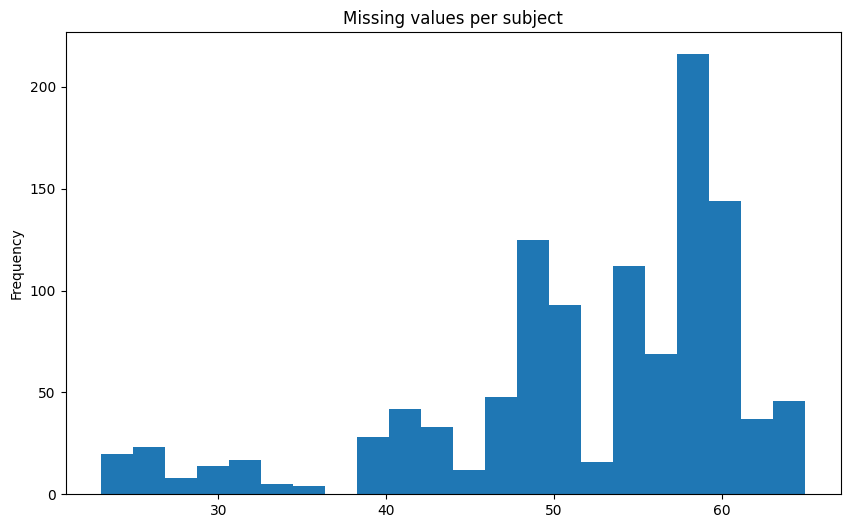

In [21]:
nan_values = ASD_phenotypic.T.isna().sum()

# Filter columns with NaN values
subjects_with_nan = nan_values[nan_values > 0]

print("Max missing values encountered for a subject: " +str(max(subjects_with_nan)))
print("Min missing values encountered for a subject: " +str(min(subjects_with_nan)))
subjects_with_nan.plot(kind='hist', bins=22, figsize=(10,6), title='Missing values per subject')
plt.show()


Let's have a look on the general statistics for the numerical attributes.

In [22]:
ASD_phenotypic.describe()

SUB_ID     DX_GROUP    DSM_IV_TR  AGE_AT_SCAN          SEX  ...  \
count   1112.000000  1112.000000  1040.000000  1112.000000  1112.000000  ...   
mean   50752.684353     1.515288     0.639423    17.048864     1.147482  ...   
std      447.680666     0.499991     0.828849     8.036419     0.354745  ...   
min    50002.000000     1.000000     0.000000     6.470000     1.000000  ...   
25%    50354.750000     1.000000     0.000000    11.658575     1.000000  ...   
50%    50724.500000     2.000000     0.000000    14.660000     1.000000  ...   
75%    51153.250000     2.000000     1.000000    20.085000     1.000000  ...   
max    51607.000000     2.000000     4.000000    64.000000     2.000000  ...   

       WISC_IV_CODING_SCALED  WISC_IV_SYM_SCALED  EYE_STATUS_AT_SCAN  \
count              55.000000           55.000000         1112.000000   
mean                8.763636            9.890909            1.312050   
std                 2.821634            2.753266            0.463539   
min                 4.000000            1.000000            1.000000   
25%                 7.000000            8.000000            1.000000   
50%                 9.000000           10.000000            1.000000   
75%                10.500000           12.000000            2.000000   
max                15.000000           16.000000            2.000000   

       AGE_AT_MPRAGE        BMI  
count     100.000000  94.000000  
mean       12.951700  20.519255  
std         2.193555   5.244446  
min         8.290000   6.530000  
25%        11.265000  17.422500  
50%        12.945000  19.945000  
75%        14.462500  22.645000  
max        17.940000  35.430000  

[8 rows x 67 columns]

We need to handle missing values. But how?
Is really necessary to fullfill all of them? Can we maybe make some feature selection previously?


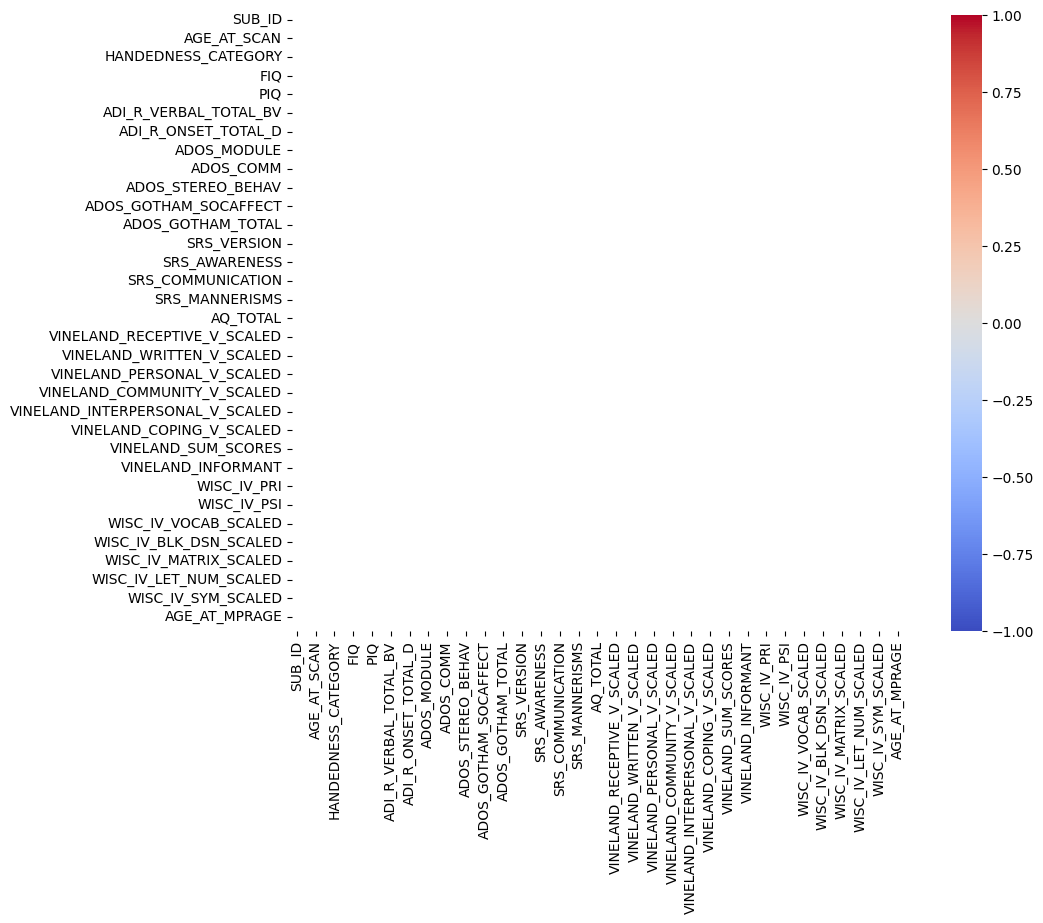

In [23]:
#vogliamo individuare e capire cosa sono questi object
numeric = ASD_phenotypic.select_dtypes(include=['float64',"int64"]).dropna()
numeric.T
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numeric.drop('DX_GROUP',axis = 1).corr(), 
            annot=True, 
            linewidths=.5, 
            fmt= '.2f',
            ax=ax,
            vmin=-1, 
            vmax=1,
            cmap = "coolwarm")
plt.show()

Drop attribute if:
- Only unique values
- Only missing values